<a href="https://colab.research.google.com/github/Kaicv27/Final.Project.Kai.Steven/blob/main/Webapp_Copy_of_Grade_Predictor_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("student-mat2.csv") #import the file
df.head() #read the first 5 rows of the file

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df = df[["G1", "G2", "G3", "famrel", "traveltime", "studytime", "freetime", "absences", "age", "Medu", "Fedu", "failures", "goout", "Dalc", "Walc"]] #only keep the attributes we need in the dataframe
predict = "G3"
X = df.drop(predict,axis=1) #new data frame that doesn't have G3 in it; features(input)
y = df[predict]

best = 0
acc_total = 0
train_time = 5
for result in range(train_time): #using for loop to run the model multiple times, selecting the best trained model and storing it by using the pickle library
  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

  regressor = RandomForestRegressor(n_estimators = 520, random_state = 42) #n_estimator describes the number of trees we used; random state is set t0 an integer for reproductivity, debugging, and comparison reason
  regressor.fit(X_train, y_train)

  acc = regressor.score(X_test, y_test) #use the test data to find the accuracy of the model

  print(acc)
  acc_total += acc

  if acc > best:
    best = acc
    with open("final_rf_model.pickle", "wb") as f:
      pickle.dump(regressor, f) #save a pickle file

pickle_in = open("final_rf_model.pickle", "rb")
regressor = pickle.load(pickle_in) #load the model

print ('The average accuracy is:' + str(acc_total/train_time)) #calculating the average accuracy
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

0.8510026149844877
0.9068396993688186
0.8751644470333182
0.8603489087210664
0.913326532862493
The average accuracy is:0.8813364405940367


,Actual,Predicted
124,8,2.575000
363,15,15.584615
73,14,11.738462
23,12,12.603846
94,14,13.548077
79,5,5.890385
370,9,7.232692
303,18,17.480769
68,8,9.405769
22,16,15.400000


<ipython-input-4-bda2da0e9f0e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-4-bda2da0e9f0e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


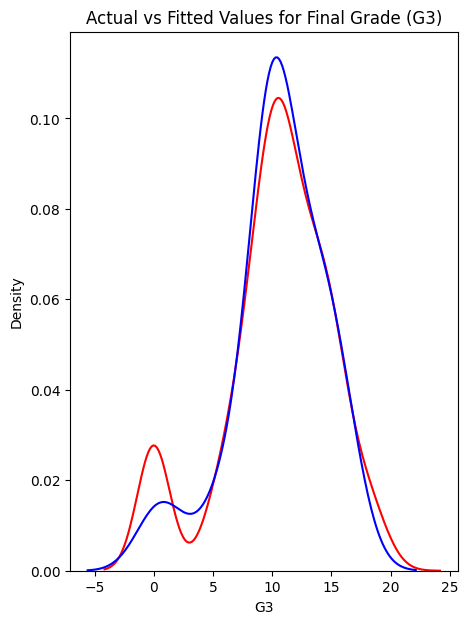

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Final Grade (G3)')


plt.show()
plt.close()

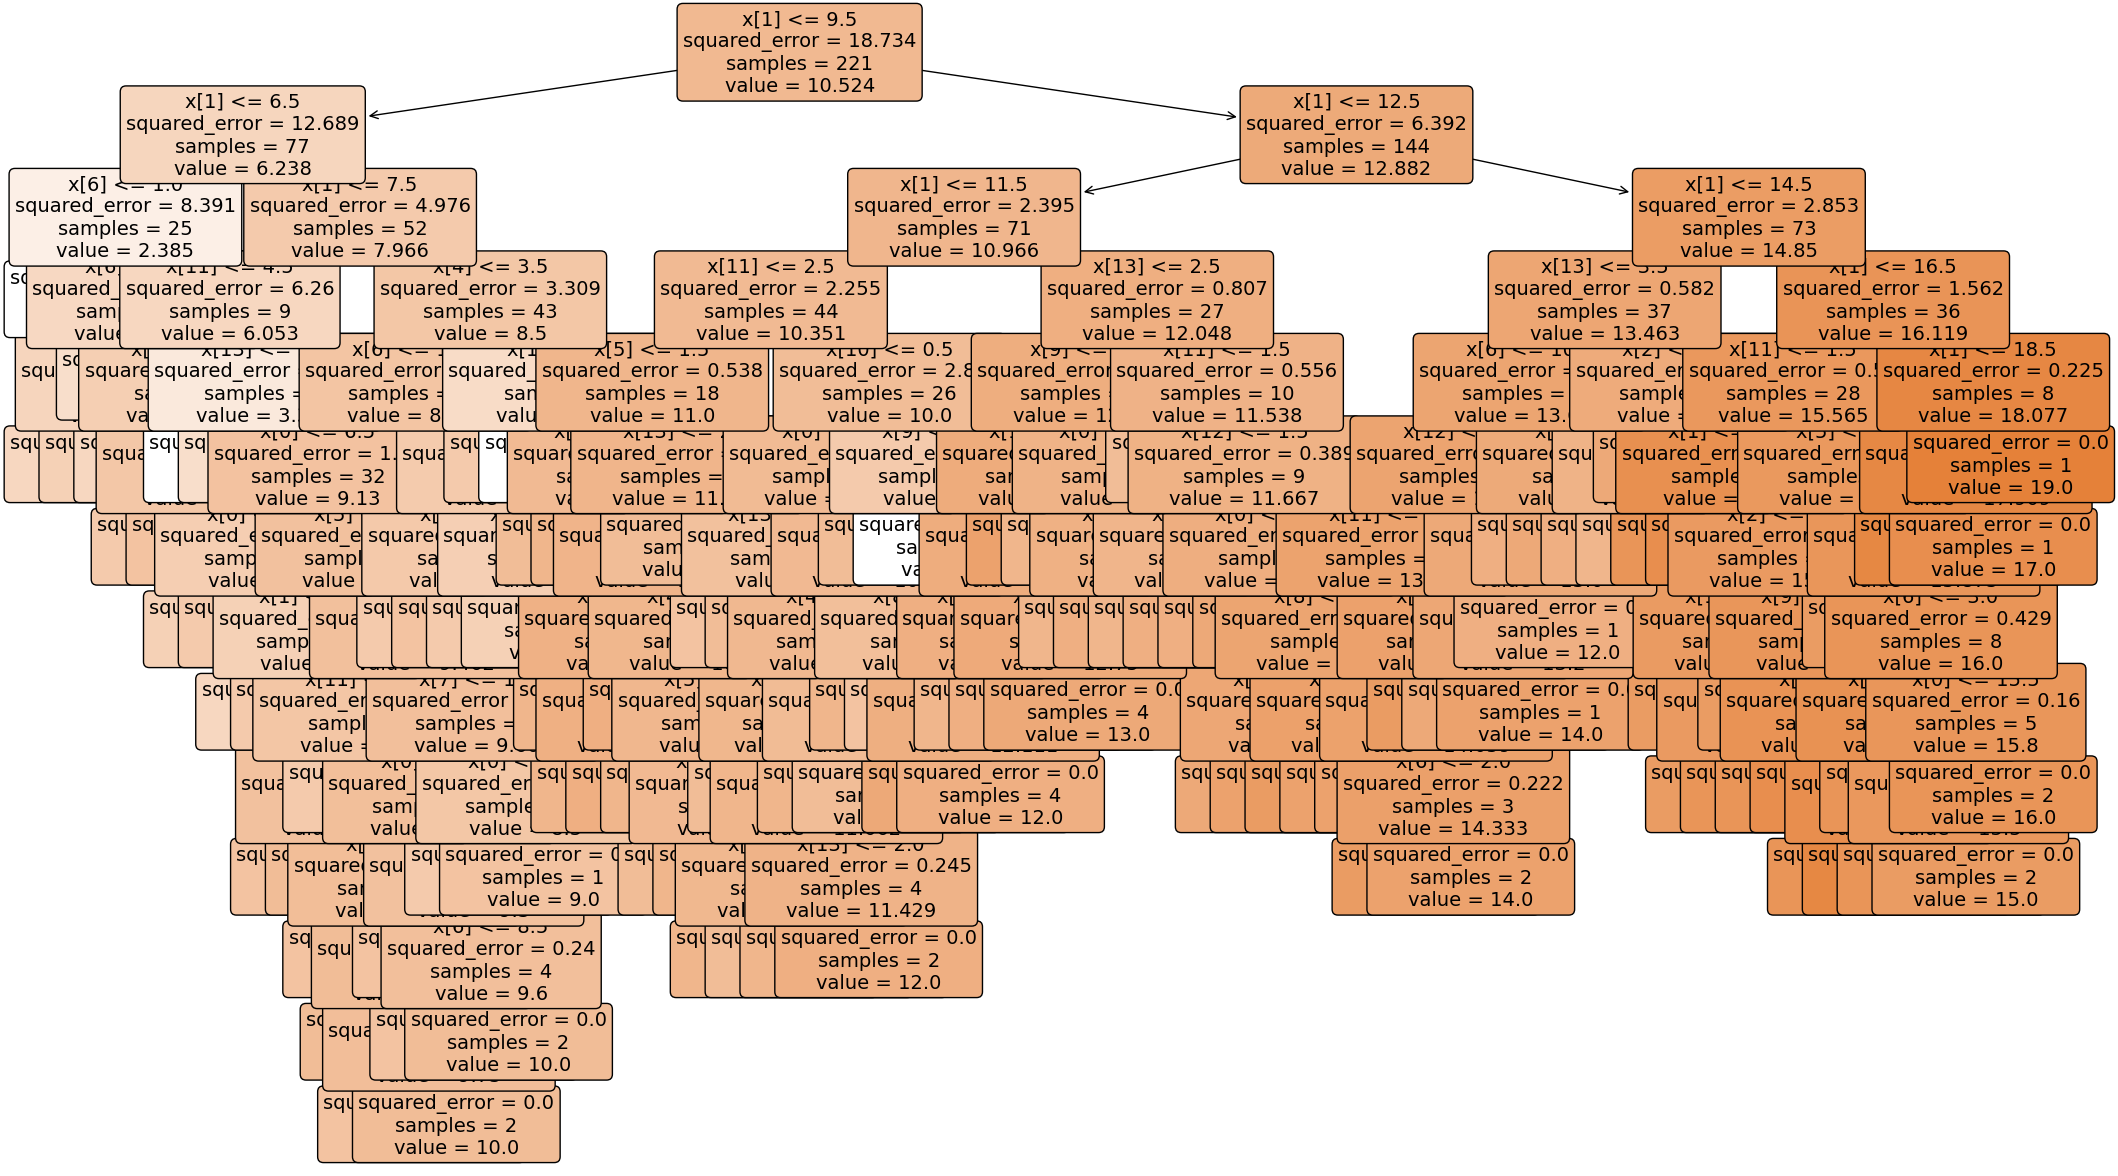

In [ ]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True,
              rounded=True,
              fontsize=14);